#### Step
1. filter genes by dbeta values
3. filter genes by TSS position
4. plot distribution of dbeta values
5. plot PCA for normal and tumor
* if you see example annotation, please replace it by your need

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
cancer = "rectal"  # example
input_file_path = "result/GDC_rectal_tissue_450k/train80"  # example
input_path = f"../../{cancer}/{input_file_path}/dbeta.csv"
dbeta = pd.read_csv(input_path)
dbeta

,ID,gene,dbeta,feature
0,cg22286978,A1BG,-0.057195,Body
1,cg27394794,A1CF,0.000501,Body
2,cg01597629,A2BP1,-0.126290,5'UTR
3,cg07218357,A2LD1,0.057881,TSS200
4,cg00134295,A2M,-0.106726,TSS1500
...,...,...,...,...
18540,cg09704136,ZYX,0.065520,Body
18541,cg12087627,ZZEF1,0.061508,Body
18542,cg05776075,ZZZ3,-0.010260,TSS1500
18543,cg20009101,psiTPTE22,0.061513,Body


#### 過濾TSS

In [3]:
# if you want filter by TSS
result_hyper_TSS = dbeta[dbeta["feature"].str.contains("TSS")]
result_hyper_TSS.to_csv(f"../../{cancer}/{input_file_path}/dbeta_TSS.csv", index=False)
result_hyper_TSS

,ID,gene,dbeta,feature
3,cg07218357,A2LD1,0.057881,TSS200
4,cg00134295,A2M,-0.106726,TSS1500
7,cg23669440,A4GNT,-0.086762,TSS1500
9,cg22861965,AAAS,-0.021146,TSS1500
11,cg21473545,AACSL,-0.059975,TSS200
...,...,...,...,...
18535,cg17722664,ZWILCH,-0.011283,TSS200
18536,cg14642833,ZWINT,-0.014943,TSS1500
18537,cg08528616,ZXDC,-0.078403,TSS1500
18539,cg23995459,ZYG11B,-0.053967,TSS1500


#### 過濾dbeta門檻值

In [22]:
def set_threshold(data, threshold, save_path):
    data = data[abs(data["dbeta"]) > threshold]
    print(data)
    data.to_csv(save_path, index=False)
    return data


threshold = 0.1  # example threshold
save_path = f"../../{cancer}/{input_file_path}/dbeta_TSS_{threshold}.csv"
filter_dbeta = set_threshold(result_hyper_TSS, threshold, save_path)

               ID     gene     dbeta  feature
4      cg00134295      A2M -0.106726  TSS1500
21     cg00910127    AARS2 -0.114824  TSS1500
36     cg06895831    ABCA4 -0.120163  TSS1500
98     cg14909495     ABP1 -0.104112   TSS200
152    cg08101264    ACOT8 -0.103003  TSS1500
...           ...      ...       ...      ...
18321  cg07643930   ZNF598 -0.139233  TSS1500
18403  cg07463519   ZNF720 -0.128613  TSS1500
18405  cg13388277   ZNF727 -0.101489  TSS1500
18420  cg08744726   ZNF767 -0.109304  TSS1500
18516  cg02348449  ZSCAN18 -0.112143  TSS1500

[677 rows x 4 columns]


#### 查看dbeta分布

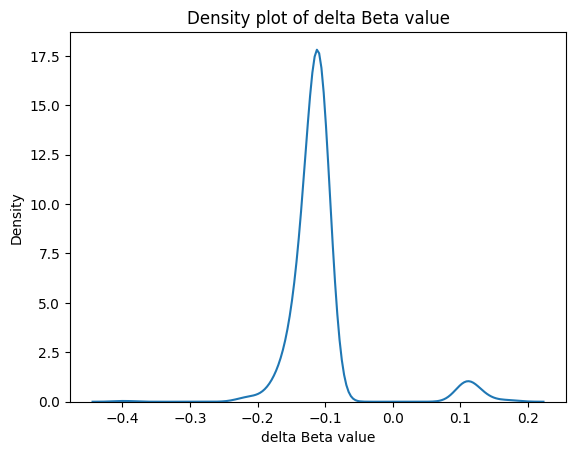

In [11]:
def get_distribution(data):
    sns.kdeplot(data["dbeta"])
    plt.xlabel("delta Beta value")
    plt.title("Density plot of delta Beta value")


get_distribution(filter_dbeta)  # example data

#### 查看normal/tumor分布

In [13]:
beta_normalized_train = pd.read_csv(f"../../{cancer}/result/GDC_rectal_tissue_450k/train80/all_beta_normalized_train_oversample_smote.csv") # example
# df_gene = beta_normalized_train
df_gene = beta_normalized_train[
    beta_normalized_train[beta_normalized_train.columns[0]].isin(filter_dbeta["ID"])
]
# df_gene.reset_index(drop=True, inplace=True)
print(df_gene.shape)
df_gene.head()

(677, 661)


,Unnamed: 0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,1.320,1.321,1.322,1.323,1.324,1.325,1.326,1.327,1.328,1.329
1281,cg04012600,0.464927,0.460024,0.494235,0.398257,0.323644,0.377474,0.334062,0.335738,0.298007,...,0.112398,0.090713,0.440813,0.267184,0.288697,0.121983,0.148587,0.363872,0.178277,0.245188
2254,cg06895831,0.530108,0.614548,0.678650,0.496504,0.480750,0.604940,0.505714,0.600550,0.618171,...,0.328085,0.198958,0.822627,0.345884,0.392014,0.211269,0.257292,0.418461,0.205065,0.335147
3268,cg09887955,0.413737,0.479233,0.469813,0.422659,0.425318,0.305158,0.437164,0.448354,0.415091,...,0.110842,0.228544,0.738926,0.140745,0.166360,0.150832,0.168403,0.147506,0.217814,0.234346
4632,cg13879177,0.515836,0.619661,0.681002,0.515608,0.515137,0.513924,0.545328,0.621668,0.594787,...,0.305275,0.375289,0.387077,0.430807,0.347767,0.300520,0.310068,0.560459,0.330747,0.433067
5979,cg17518550,0.546405,0.571670,0.611277,0.576901,0.612116,0.524523,0.553246,0.537563,0.532827,...,0.178157,0.074819,0.138914,0.230236,0.136737,0.103042,0.110047,0.080935,0.108496,0.257397


In [14]:
# if data has been splitted into train and test set, you can use this code
# label = beta_normalized_train[
#     beta_normalized_train[beta_normalized_train.columns[0]] == "label"
# ]
# normal_columns = label.columns[(label.iloc[0] == 0.0)].tolist()
# tumor_columns = label.columns[(label.iloc[0] == 1.0)].tolist()
# train_normal = df_gene[normal_columns]
# train_tumor = df_gene[tumor_columns]

# if normal and tumor label are continuous
normal_count = 330  # example
train_normal = df_gene.iloc[
    :, 1 : normal_count + 1
]  # if your data is duplicate, please filter by yuorself
train_tumor = df_gene.iloc[
    :, normal_count + 1 ::
]  # if your data is duplicate, please filter by yuorself

print(train_tumor.shape)
print(train_normal.shape)

(677, 330)
(677, 330)


In [15]:
X = pd.concat([train_normal, train_tumor], axis=1).T
normal_count = 330  # example normal count
y = [(0 if i < normal_count else 1) for i in range(X.shape[0])]
print(X.shape)
print(len(y))

(660, 677)
660


In [16]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


def plot_pca_3d(elev, azim):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="viridis")
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title("PCA of Iris Dataset")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")

    ax.view_init(elev=elev, azim=azim)
    plt.show()


interact(
    plot_pca_3d,
    elev=widgets.FloatSlider(min=0, max=360, step=1, value=30),
    azim=widgets.FloatSlider(min=0, max=360, step=1, value=120),
)

interactive(children=(FloatSlider(value=30.0, description='elev', max=360.0, step=1.0), FloatSlider(value=120.…

<function __main__.plot_pca_3d(elev, azim)>